# Теория вероятностей и математическая статистика

### Урок 7. Многомерный статистический анализ. Линейная регрессия

Урок 7

1. Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks):
    - zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110],
    - ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832].
    
   Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная).
   Произвести расчет как с использованием intercept, так и без.

2. Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

3. $*$ Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

In [1]:
import numpy as np

## Задача 1

Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks):

zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110],

ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832].

Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная).

Произвести расчет как с использованием intercept, так и без.

$zp \equiv X, ks \equiv y$

In [2]:
# s
X = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
X

array([ 35,  45, 190, 200,  40,  70,  54, 150, 120, 110])

In [3]:
# p
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
y 

array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

1. Сбор данных. Анализируем cстатистические данные.
2. Предполагаем линейную связь между x и y
3. Считаем коэффициенты $\beta_0$ и $\beta_1$, так, что линия проходит максимально близко к значениям (x, y)
4. Получаем линейную модель
5. Оценка статистической значимости модели

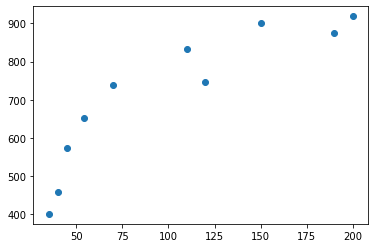

In [4]:
# Построим на графике исходные данные

import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(X, y)
plt.show()

Считаем что зависимость линейная. 

Посчитаем коэффициенты линейной регрессии $\beta_0$ и $\beta_1$ ($zp \equiv X, sp \equiv y$)

$$\widehat{y}=\beta_0 + \beta_1*x$$

Коэффициенты уравнения линейной регрессии можно найти следующим образом:

$$b = \frac{\overline{yx} - \overline{y} \cdot {\overline{x}}}{\overline{x^2} - (\overline{x})^2};$$


$$a = \overline{y} - b \cdot {\overline{x}}.$$


$$b \equiv \beta_1, a \equiv \beta_0$$

**1.1 Посчитаем коэффициенты линейной регрессии c использованием intercept $\beta_0$**

In [5]:
beta_1=(np.mean(X*y) - np.mean(X)*np.mean(y))/(np.mean(X**2) - np.mean(X)**2)
beta_1

2.620538882402765

In [6]:
beta_0=np.mean(y)-beta_1*np.mean(X)
beta_0

444.1773573243596

In [7]:
# y_hat = 444.18 + 2.62054*X
y_hat = beta_0 + beta_1*X
y_hat

array([535.89621821, 562.10160703, 942.07974498, 968.2851338 ,
       548.99891262, 627.61507909, 585.68645697, 837.25818968,
       758.64202321, 732.43663439])

In [8]:
# matplotlib.markers: https://matplotlib.org/stable/api/markers_api.html#module-matplotlib.markers
# matplotlib.pyplot.plot: https://matplotlib.org/2.1.1/api/_as_gen/matplotlib.pyplot.plot.html

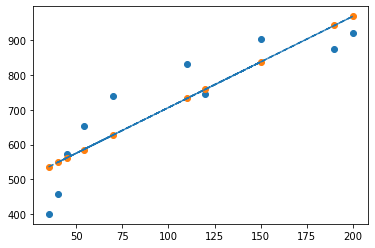

In [9]:
# Построим на одном графике исходные данные и теоретическую прямую, построенную по уравнению регрессии:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(X, y)
plt.scatter(X, y_hat, marker='o')
plt.plot(X, 444.2 + 2.62*X, '--')
plt.show()

In [10]:
n = len(X)
# Функция потерь
mse = ((y-y_hat)**2).sum()/n
mse

6470.414201176658

**1.2 Посчитаем коэффициенты линейной регрессии без использования intercept $\beta_0$** (считаем $\beta_0 = 0$)

Для нахождения коэффициента $\beta_1$ используем матричный метод

In [11]:
# zp = zp.reshape(1, len(zp))
X = X.reshape(len(X), 1)
X

array([[ 35],
       [ 45],
       [190],
       [200],
       [ 40],
       [ 70],
       [ 54],
       [150],
       [120],
       [110]])

In [12]:
# ks = ks.reshape(1, len(ks))
y = y.reshape(len(y), 1)
y

array([[401],
       [574],
       [874],
       [919],
       [459],
       [739],
       [653],
       [902],
       [746],
       [832]])

In [13]:
# np.dot(np.dot(np.linalg.inv(np.dot(X, X.T)), X), y.T)
np.dot(np.linalg.inv(np.dot(X.T, X)), X.T@y)

array([[5.88982042]])

In [14]:
beta_0 = 0
beta_1 = 5.88982042
beta_1

5.88982042

$$y = \beta_1*X$$

In [15]:
y_hat = beta_1*X
y_hat

array([[ 206.1437147 ],
       [ 265.0419189 ],
       [1119.0658798 ],
       [1177.964084  ],
       [ 235.5928168 ],
       [ 412.2874294 ],
       [ 318.05030268],
       [ 883.473063  ],
       [ 706.7784504 ],
       [ 647.8802462 ]])

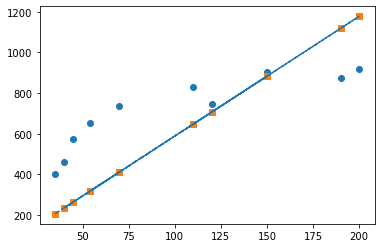

In [16]:
plt.scatter(X, y)
plt.scatter(X, y_hat, marker='s')
plt.plot(X, beta_1*X, '--')
plt.show()

In [17]:
# Функция потерь (mse - среднеквадратичная ошибка)
mse_ = np.sum((y_hat - y) ** 2 / 10)
mse_

56516.85841571942

In [18]:
def mse_(w1, y=y, X=X, n=10):
    return np.sum((w1 * X - y) ** 2) / n

In [19]:
mse_(beta_1)

56516.85841571943

Значение среднеквадратичной ошибки с использованием $\beta_0$: $mse_o = 6470.414201176658$.

Значение среднеквадратичной ошибки без использованием $\beta_0$: $mse = 56516.858415719428$.

Функция потерь выросла почти в 9 раз.

In [20]:
56516.858415719428/6470.414201176658

8.734658502301402

## Задача 2

Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [21]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
X = zp
y = ks

In [22]:
alpha = 1e-6  # Скорость обучения a = 0.000001
alpha

1e-06

In [23]:
B1 = 0.1  # Стартовое значение коэффициента beta_1 из N(0, 1) из диапазона (-3, 3)

In [24]:
n = len(X)  # Длина массива

In [25]:
def mse_(B1, y=y, X=X, n=n):
    return np.sum((B1*X-y)**2)/n

In [26]:
# mse = (1/n)*np.sum((B1*X-y)**2)

In [27]:
# mse_p = (2/n)*np.sum((B1*X-y)*X)  # Производная от mse

In [28]:
for i in range (10):
    B1 -= alpha*(2/n)*np.sum((B1*X-y)*X)
    if i%1 == 0:
        print(f'B1= {B1}')    

B1= 0.25952808
B1= 0.414660650906144
B1= 0.5655188230595969
B1= 0.7122203698240712
B1= 0.8548798195302346
B1= 0.9936085448867542
B1= 1.1285148499277806
B1= 1.2597040545647504
B1= 1.387278576808517
B1= 1.5113380127259965


In [29]:
for i in range(1500):
    B1 -= alpha*(2/n)*np.sum((B1*X-y)*X)
    if i%100 == 0:
        print(f'iteration: {i}, B1={B1}, mse={mse_(B1)}')

iteration: 0, B1=1.6319792141937546, mse=306275.7568040035
iteration: 100, B1=5.629340281237233, mse=57451.59938606899
iteration: 200, B1=5.873885137561711, mse=56520.35675226433
iteration: 300, B1=5.888845554134484, mse=56516.87150850017
iteration: 400, B1=5.889760781170516, mse=56516.85846472009
iteration: 500, B1=5.889816771625289, mse=56516.8584159028
iteration: 600, B1=5.889820196929507, mse=56516.85841572009
iteration: 700, B1=5.8898204064778845, mse=56516.85841571941
iteration: 800, B1=5.889820419297334, mse=56516.85841571941
iteration: 900, B1=5.889820420081584, mse=56516.85841571941
iteration: 1000, B1=5.8898204201295625, mse=56516.85841571941
iteration: 1100, B1=5.889820420132498, mse=56516.85841571941
iteration: 1200, B1=5.889820420132673, mse=56516.85841571943
iteration: 1300, B1=5.889820420132673, mse=56516.85841571943
iteration: 1400, B1=5.889820420132673, mse=56516.85841571943


In [41]:
mse_(5.889820420081584)

56516.85841571941

$\beta_1=5.889820420132673$

In [42]:
np.corrcoef(X, y)  # Коэффициент корреляции

array([[1.        , 0.88749009],
       [0.88749009, 1.        ]])

In [34]:
y_hat = B1*X
y_hat

array([ 206.1437147 ,  265.04191891, 1119.06587983, 1177.96408403,
        235.59281681,  412.28742941,  318.05030269,  883.47306302,
        706.77845042,  647.88024621])

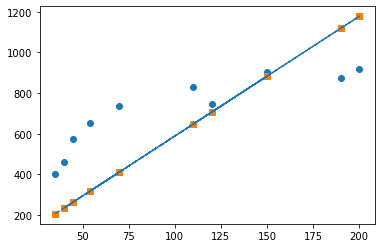

In [43]:
plt.scatter(X, y)
plt.scatter(X, y_hat, marker='s')
plt.plot(X, beta_1*X, '--')
plt.show()

PS: Common Math Symbols in HTML, TeX, and Unicode - https://www.johndcook.com/blog/math_symbols/

In [ ]:
# Примеры:
# plt.scatter(X, y_hat, marker='^', color='red')
# plt.scatter(X, y_hat, marker='s', color='black')
# plt.plot(X, 444.2 + 2.62*X, 'r--', color='blue')
# plt.plot(X, 444.2 + 2.62*X, 'c--')

In [ ]:
# Презентации и данные. Знакомство с R - https://varmara.github.io/mathmethr/lectures.html